In [3]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from textblob import Word
import matplotlib
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
# from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing, linear_model, naive_bayes, metrics, svm
from nltk.tokenize import sent_tokenize
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
News_Data = pd.read_csv("C:\\Users\\manar\\OneDrive\\Desktop\\news.csv")

In [9]:
def tokenize_only(text):
    # Sentence tokenize the text
    # sentences = []
    sentences = sent_tokenize(text)
    return sentences

In [10]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_y, model_name, vector_name):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    # Plot Confusion Matrix for each model
    cm = confusion_matrix(valid_y, predictions)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    title_cm = 'Confusion Matrix for ' + model_name + ' using ' + vector_name
    cm_display.ax_.set(
        title=title_cm,
        xlabel='Predicted Labels',
        ylabel='True Labels'
    )
    plt.show()

    return metrics.accuracy_score(predictions, valid_y)



In [11]:
def sentence_to_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [12]:
# preprocessing steps like lower case, stemming and lemmatization

newsTextList = News_Data['text'].apply(tokenize_only)

stop = stopwords.words('english')
st = PorterStemmer()
st_snow_ball = SnowballStemmer('english')

News_Data['text'] = News_Data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
News_Data['text'] = News_Data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# News_Data['text'] = News_Data['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
News_Data['text'] = News_Data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

News_Data['title'] = News_Data['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
News_Data['title'] = News_Data['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# News_Data['title'] = News_Data['title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
News_Data['text'] = News_Data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

X = News_Data['text']
Y = News_Data["label"]
encoder = preprocessing.LabelEncoder()
y_encoded = encoder.fit_transform(Y)

In [13]:
# TF-IDF Vectorizer on text column
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X)
x_after_tfidf = tfidf_vect.transform(X)

In [22]:
# Word2Vec Vectorizer on text column
# Word2Vec_model = Word2Vec(X)
# vector = [sentence_to_vector(sentence, Word2Vec_model) for sentence in X]

In [24]:
# CountVectorizer on text column
count_vectorizer = CountVectorizer()
X_count_vectorizer = count_vectorizer.fit_transform(X)


train_x_After_TFIDF,  valid_x_After_TFIDF, train_yAfter_TFIDF, valid_yAfter_TFIDF = train_test_split(x_after_tfidf,
                                                                                                     y_encoded)
# train_x_After_Word2Vec,  valid_x_After_Word2Vec, train_yAfter_Word2Vec, valid_yAfter_Word2Vec = train_test_split(vector,y_encoded)
train_x_After_CountVect,  valid_x_After_CountVect, train_yAfter_CountVect, valid_yAfter_CountVect = train_test_split(X_count_vectorizer, y_encoded)

Training_Models = ['PassiveAggressiveClassifier', 'LogisticRegression', 'MultinomialNB']


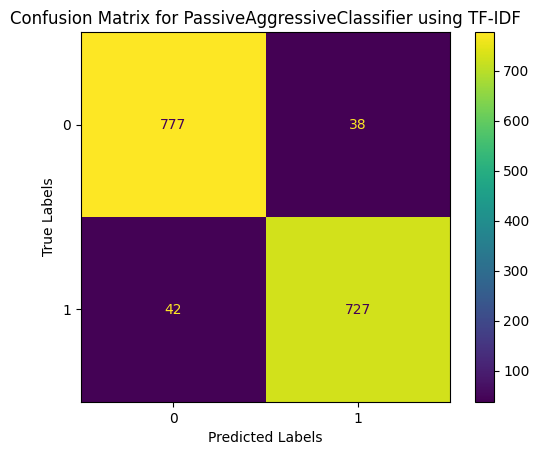

Accuracy of PassiveAggressiveClassifier using TF-IDF and lemmatizing:  0.9494949494949495


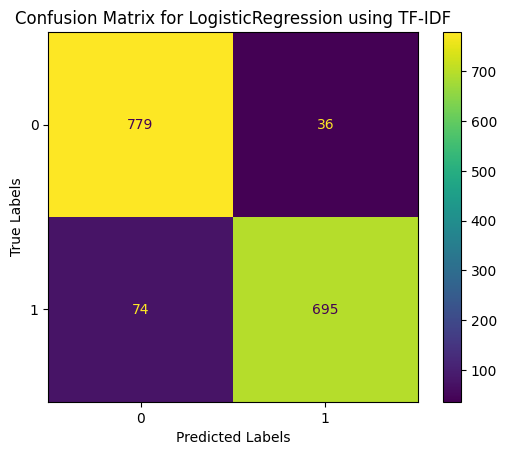

Accuracy of LogisticRegression using TF-IDF and lemmatizing:  0.9305555555555556


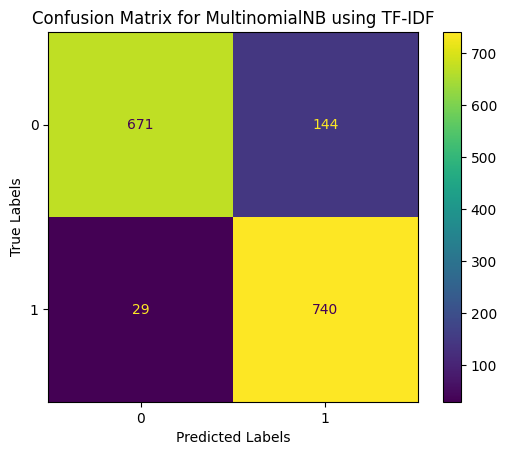

Accuracy of NaiveBayes using TF-IDF and lemmatizing:  0.8907828282828283


In [25]:
# Train Models using TF-IDF
Accuracies_of_Models_For_TFIDF = []

accuracy_PassiveAggressiveClassifier_TFIDF = train_model(PassiveAggressiveClassifier(random_state=42),
                                                         train_x_After_TFIDF, train_yAfter_TFIDF, valid_x_After_TFIDF,
                                                         valid_yAfter_TFIDF, 'PassiveAggressiveClassifier', 'TF-IDF')
print("Accuracy of PassiveAggressiveClassifier using TF-IDF and lemmatizing: ",
      accuracy_PassiveAggressiveClassifier_TFIDF)
Accuracies_of_Models_For_TFIDF.append(accuracy_PassiveAggressiveClassifier_TFIDF*100)

accuracy_LogisticRegression_TFIDF = train_model(linear_model.LogisticRegression(), train_x_After_TFIDF,
                                                train_yAfter_TFIDF, valid_x_After_TFIDF, valid_yAfter_TFIDF,
                                                'LogisticRegression', 'TF-IDF')

print("Accuracy of LogisticRegression using TF-IDF and lemmatizing: ", accuracy_LogisticRegression_TFIDF)
Accuracies_of_Models_For_TFIDF.append(accuracy_LogisticRegression_TFIDF*100)

accuracy_MultinomialNB_TFIDF = train_model(naive_bayes.MultinomialNB(alpha=0.2), train_x_After_TFIDF, train_yAfter_TFIDF
                                           , valid_x_After_TFIDF, valid_yAfter_TFIDF, 'MultinomialNB', 'TF-IDF')
print("Accuracy of NaiveBayes using TF-IDF and lemmatizing: ", accuracy_MultinomialNB_TFIDF)
Accuracies_of_Models_For_TFIDF.append(accuracy_MultinomialNB_TFIDF*100)

In [26]:
# Train Models using Word2Vec
# Accuracies_of_Models_For_Word2Vec = []
# accuracy_PassiveAggressiveClassifier_Word2Vec = train_model(PassiveAggressiveClassifier(random_state=42),
#                                                             train_x_After_Word2Vec, train_yAfter_Word2Vec,
#                                                             valid_x_After_Word2Vec, valid_yAfter_Word2Vec,
#                                                             'PassiveAggressiveClassifier', 'Word2Vec')
# print("Accuracy of PassiveAggressiveClassifier using Word2Vec and lemmatizing: ",
#       accuracy_PassiveAggressiveClassifier_Word2Vec)
# Accuracies_of_Models_For_Word2Vec.append(accuracy_PassiveAggressiveClassifier_Word2Vec*100)

# accuracy_LogisticRegression_Word2Vec = train_model(linear_model.LogisticRegression(), train_x_After_Word2Vec,
#                                                    train_yAfter_Word2Vec, valid_x_After_Word2Vec, valid_yAfter_Word2Vec,
#                                                    'LogisticRegression', 'Word2Vec')
# print("Accuracy of LogisticRegression using Word2Vec and lemmatizing: ", accuracy_LogisticRegression_Word2Vec)
# Accuracies_of_Models_For_Word2Vec.append(accuracy_LogisticRegression_Word2Vec*100)

# scaler = MinMaxScaler()
# train_x_After_Word2Vec_scaled = scaler.fit_transform(train_x_After_Word2Vec)
# valid_x_After_Word2Vec_scaled = scaler.transform(valid_x_After_Word2Vec)

# accuracy_MultinomialNB_Word2Vec = train_model(naive_bayes.MultinomialNB(alpha=0.2), train_x_After_Word2Vec_scaled,
#                                               train_yAfter_Word2Vec, valid_x_After_Word2Vec_scaled,
#                                               valid_yAfter_Word2Vec, 'MultinomialNB', 'Word2Vec')
# print("Accuracy of NaiveBayes using Word2Vec and lemmatizing: ", accuracy_MultinomialNB_Word2Vec)
# Accuracies_of_Models_For_Word2Vec.append(accuracy_MultinomialNB_Word2Vec*100)

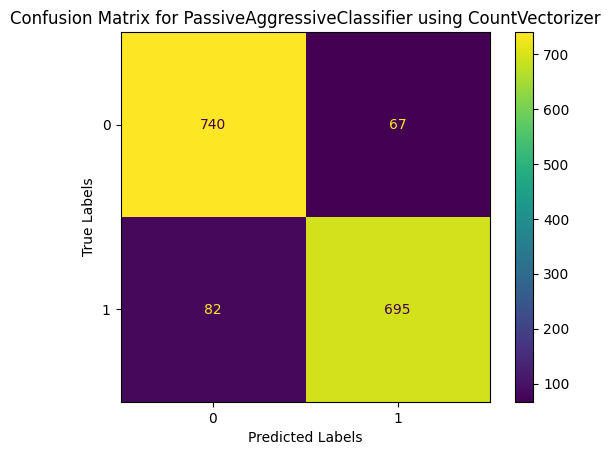

Accuracy of PassiveAggressiveClassifier using CountVectorizer and lemmatizing:  0.9059343434343434


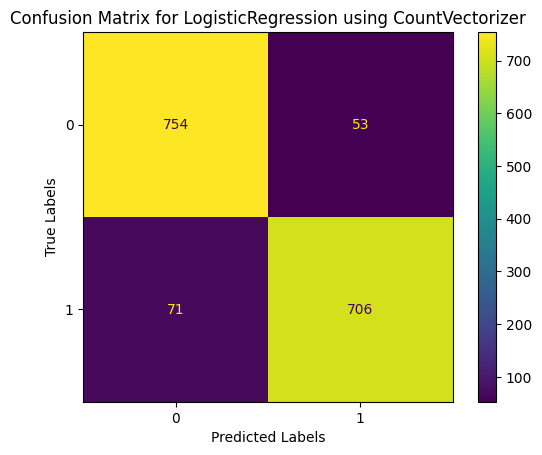

Accuracy of LogisticRegression using CountVectorizer and lemmatizing:  0.9217171717171717


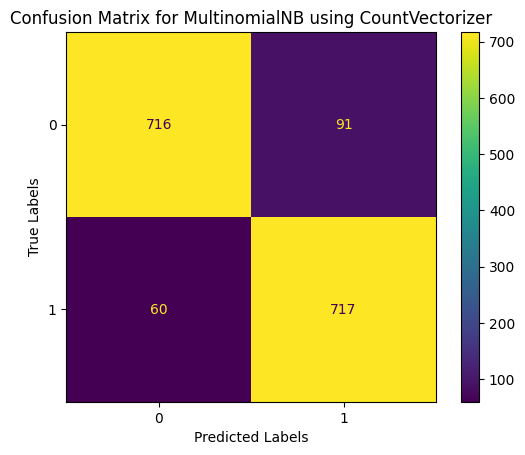

Accuracy of NaiveBayes using CountVectorizer and lemmatizing:  0.9046717171717171


In [27]:
# Train Model using CountVectorizer
Accuracies_of_Models_For_CountVectorizer = []
accuracy_PassiveAggressiveClassifier_CountVectorizer = train_model(PassiveAggressiveClassifier(random_state=42),
                                                                   train_x_After_CountVect, train_yAfter_CountVect,
                                                                   valid_x_After_CountVect, valid_yAfter_CountVect,
                                                                   'PassiveAggressiveClassifier', 'CountVectorizer')
print("Accuracy of PassiveAggressiveClassifier using CountVectorizer and lemmatizing: ",
      accuracy_PassiveAggressiveClassifier_CountVectorizer)
Accuracies_of_Models_For_CountVectorizer.append(accuracy_PassiveAggressiveClassifier_CountVectorizer*100)

accuracy_LogisticRegression_CountVectorizer = train_model(linear_model.LogisticRegression(), train_x_After_CountVect,
                                                          train_yAfter_CountVect,  valid_x_After_CountVect,
                                                          valid_yAfter_CountVect,
                                                          'LogisticRegression', 'CountVectorizer')
print("Accuracy of LogisticRegression using CountVectorizer and lemmatizing: ",
      accuracy_LogisticRegression_CountVectorizer)
Accuracies_of_Models_For_CountVectorizer.append(accuracy_LogisticRegression_CountVectorizer*100)

accuracy_MultinomialNB_CountVectorizer = train_model(naive_bayes.MultinomialNB(alpha=0.2), train_x_After_CountVect,
                                                     train_yAfter_CountVect,  valid_x_After_CountVect,
                                                     valid_yAfter_CountVect, 'MultinomialNB', 'CountVectorizer')
print("Accuracy of NaiveBayes using CountVectorizer and lemmatizing: ", accuracy_MultinomialNB_CountVectorizer)
Accuracies_of_Models_For_CountVectorizer.append(accuracy_MultinomialNB_CountVectorizer*100)

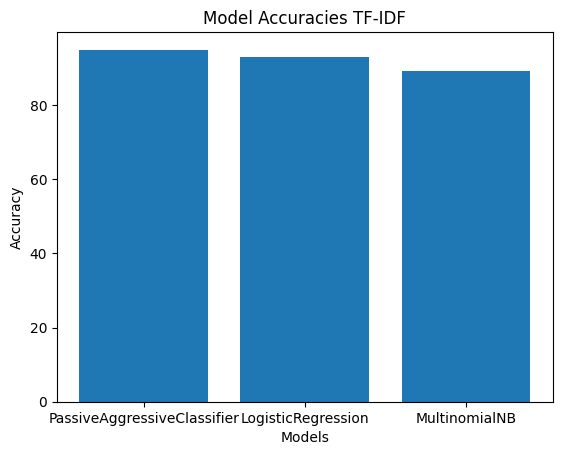

In [28]:
# Plot Accuracies Bar Graph of TF-IDF
plt.bar(Training_Models, Accuracies_of_Models_For_TFIDF)
plt.title('Model Accuracies TF-IDF')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [29]:
# Plot Accuracies Bar Graph of Word2Vec
# plt.bar(Training_Models, Accuracies_of_Models_For_Word2Vec)
# plt.title('Model Accuracies Word2Vec')
# plt.xlabel('Models')
# plt.ylabel('Accuracy')
# plt.show()

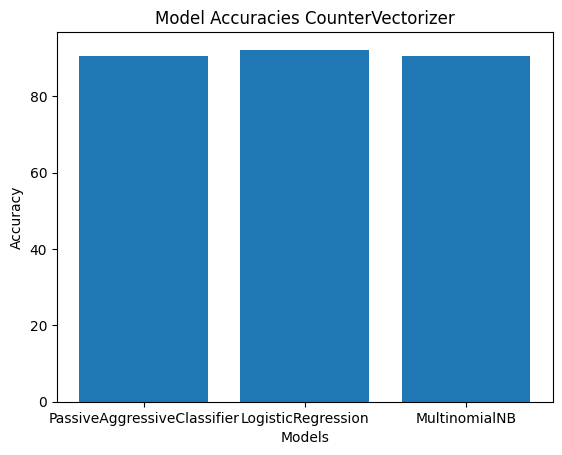

In [30]:
# Plot Accuracies Bar Graph of CounterVectorizer
plt.bar(Training_Models, Accuracies_of_Models_For_CountVectorizer)
plt.title('Model Accuracies CounterVectorizer')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()